# Agenda :House Price Prediction

In [400]:
#importing important library

In [401]:
#import important libraries for house price prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [402]:
#load the dataset 
house_predict =pd.read_csv(r"D:\raw data\house builder.csv")

In [403]:
house_predict.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [404]:
house_predict.shape

(21613, 21)

In [405]:
house_predict.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [406]:
house_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [407]:
house_predict.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# understanding the dataset and data preprocessing

In [408]:
#Price is my dependent variable remaining are  my independent variable.

In [ ]:
#preprocessing of dataset

In [409]:
#Dropping the attribute and combining attribute of the dataset.

In [410]:
#Independent variable (id) does not any impact with target variable(price).so,drop id in the dataset

In [411]:
house_predict.drop(['id'],axis=1,inplace=True)

In [412]:
#logically room increase  price also increase.In this dataset rooms are splitted into bathrooms and bedrooms.We combine both into total rooms    

In [413]:
#In this dataset bathrooms given in floating value.generally  in integer value .so,converting floating value into nearest integer. 

In [414]:
house_predict.bathrooms=house_predict.bathrooms.map({0:0,0.5:1,0.75:1,1:1,1.25:1,1.5:2,1.75:2,2:2,2.25:2,2.5:3,2.75:3,3:3,3.25:3,3.5:4,3.75:4,4:4,4.25:4,4.5:5,4.75:5,5:5,5.25:5,5.5:6,5.75:6,6:6,6.25:6,6.5:7,6.75:7,7.5:8,7.75:8,8:8})
house_predict['bathrooms'].value_counts()

2    8471
3    7907
1    3937
4    1101
5     157
6      22
0      10
7       4
8       4
Name: bathrooms, dtype: int64

In [415]:
house_predict['total rooms']=house_predict['bedrooms']+house_predict['bathrooms']

In [416]:
#By using some manipulation two feature variables into one feature variable.(two feature variables are yr_built,yr_renovated) 

In [417]:
house_predict['renovated age']=[2015-i if i!=0 else 0 for i in house_predict['yr_renovated']]

In [418]:
house_predict['building age']=[2015-i for i in house_predict['yr_built']]

In [419]:
house_predict['current age']=[b if r==0 else int((r+b)/2) for r,b in zip(house_predict['renovated age'],house_predict['building age'])]

In [420]:
house_predict.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total rooms,renovated age,building age,current age
0,20141013T000000,221900.0,3,1,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,4,0,60,60
1,20141209T000000,538000.0,3,2,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,5,24,64,44
2,20150225T000000,180000.0,2,1,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,3,0,82,82
3,20141209T000000,604000.0,4,3,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,7,0,50,50
4,20150218T000000,510000.0,3,2,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,5,0,28,28


In [421]:
house_predict.drop(['renovated age'],axis=1,inplace=True)

In [422]:
house_predict.drop(['building age'],axis=1,inplace=True)

In [423]:
house_predict.drop(['yr_built'],axis=1,inplace=True)

In [424]:
house_predict.drop(['yr_renovated'],axis=1,inplace=True)

In [425]:
house_predict.drop(['bedrooms'],axis=1,inplace=True)

In [426]:
house_predict.drop(['bathrooms'],axis=1,inplace=True)

In [427]:
house_predict.floors=house_predict.floors.map({1.0:1,1.5:2,2:2,2.5:3,3:3,3.5:4})
house_predict['floors'].value_counts()

1    10680
2    10151
3      774
4        8
Name: floors, dtype: int64

In [428]:
house_predict.head()

,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,total rooms,current age
0,20141013T000000,221900.0,1180,5650,1,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,4,60
1,20141209T000000,538000.0,2570,7242,2,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,5,44
2,20150225T000000,180000.0,770,10000,1,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,3,82
3,20141209T000000,604000.0,1960,5000,1,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,7,50
4,20150218T000000,510000.0,1680,8080,1,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,5,28


# Exploratory Data Analysis(EDA)

In [430]:
#correlation matrix 

<AxesSubplot:>

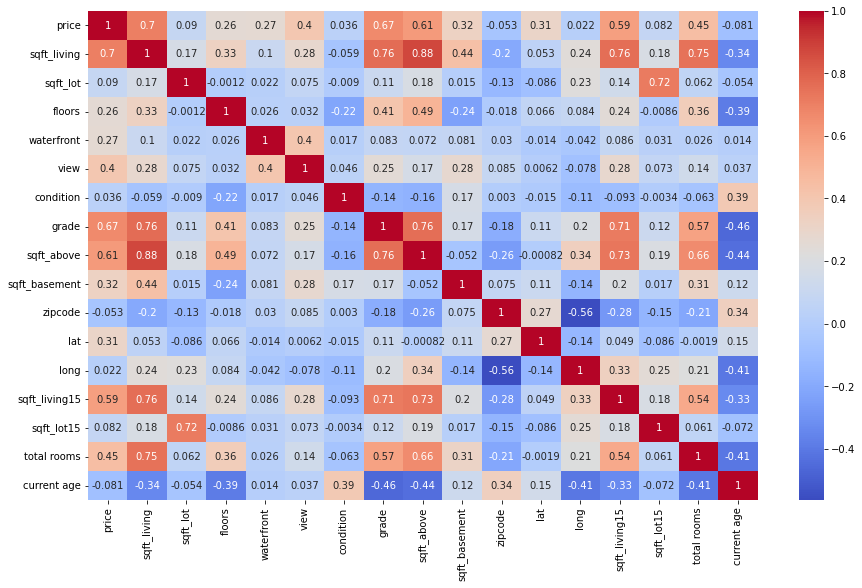

In [431]:
corr=house_predict.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')

# #feature selection 

In [ ]:
#checking correlation with my target variable vs feature variable by using above correlation matrix
#after checking correlation following varibles are high and medium correlation
#1.totalrooms
#2.sqft_living            
#3.floors         
#4.waterfront       
#5.view   
#6.grade           
#8.sqft_basement         
#9.lat              
#10.sqft_living15
#11.sqft_above

In [433]:
#checking multicollineartity  with feature varibles  using correlation matrix
#sqft_living15,sqft_above highly correlated with eachother . Those feature variable giving  similar meaning. 
#so,select the highly correlated with target variable  only.

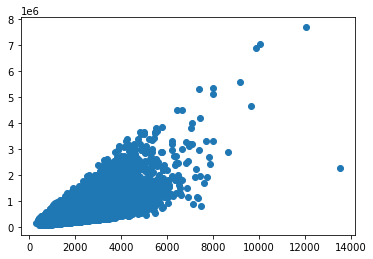

In [434]:
plt.scatter(house_predict['sqft_living'],house_predict['price'])

In [ ]:
#The above figure shows my independent variable highly correlated with target variable.
#so,we select sqft_living as feature variable.  

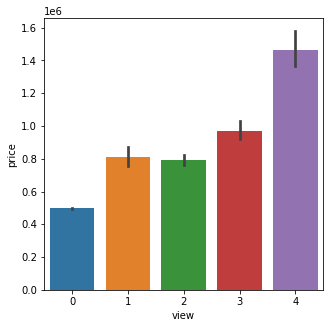

In [435]:
plt.figure(figsize=(5, 5))
sns.barplot(x='view', y='price',data=house_predict)
plt.show()

In [ ]:
#The above figure shows my feature variable medium correlated with target variable.
##so,we select view as feature variable.

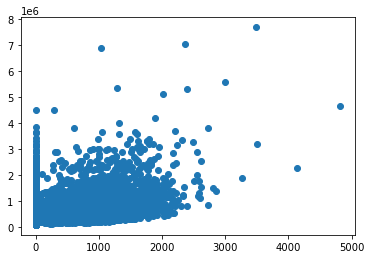

In [436]:
plt.scatter(house_predict['sqft_basement'],house_predict['price'])

In [ ]:
#The above figure shows my feature variable very less correlated with target variable.
###so,we do not select sqft_basement  as feature variable.

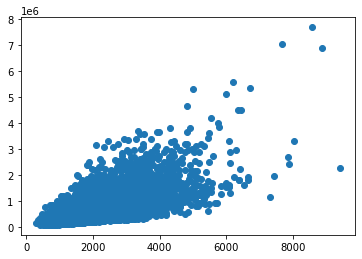

In [437]:
plt.scatter(house_predict['sqft_above'],house_predict['price'])

In [ ]:
#The above figure shows my feature variable highly correlated with target variable.
#so,we select sqft_above as feature variable.

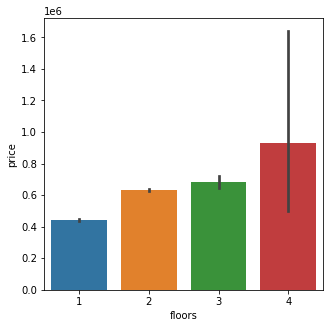

In [438]:
plt.figure(figsize=(5, 5))
sns.barplot(x='floors', y='price',data=house_predict)
plt.show()

In [ ]:
#The above figure shows my feature variable medium correlated with target variable.
#so,we select floors as feature variable.

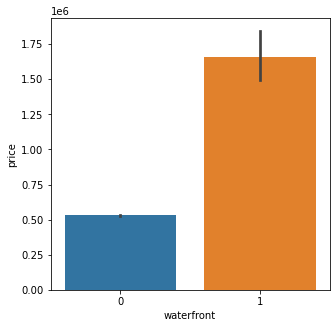

In [439]:
plt.figure(figsize=(5, 5))
sns.barplot(x='waterfront', y='price',data=house_predict)
plt.show()

In [ ]:
#The above figure shows my feature variable medium correlated with target variable.
#so,we select waterfront as feature variable.

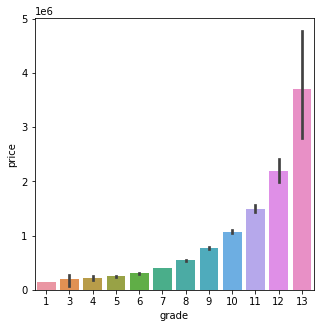

In [440]:
plt.figure(figsize=(5, 5))
sns.barplot(x='grade', y='price',data=house_predict)
plt.show()

In [ ]:
##The above figure shows my feature variable expontially correlated with target variable.
#so,we select grade as feature variable.

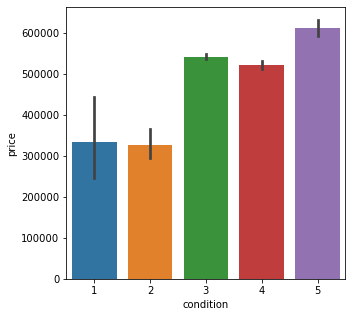

In [441]:
plt.figure(figsize=(5, 5))
sns.barplot(x='condition', y='price',data=house_predict)
plt.show()

In [ ]:
#The above figure shows my feature variable veryless correlated with target variable.
#so,we do not select condition as feature variable.

In [442]:
df=house_predict.sort_values(["price"],ascending=False).reset_index(drop=True)
df

,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,total rooms,current age
0,20141013T000000,7700000.0,12050,27600,3,0,3,4,13,8570,3480,98102,47.6298,-122.323,3940,8800,14,66
1,20140611T000000,7062500.0,10040,37325,2,1,2,3,11,7680,2360,98004,47.6500,-122.214,3930,25449,10,44
2,20140919T000000,6885000.0,9890,31374,2,0,4,3,13,8860,1030,98039,47.6305,-122.240,4540,42730,14,14
3,20140804T000000,5570000.0,9200,35069,2,0,0,3,13,6200,3000,98039,47.6289,-122.233,3560,24345,11,14
4,20150413T000000,5350000.0,8000,23985,2,0,4,3,12,6720,1280,98004,47.6232,-122.220,4600,21750,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20141105T000000,82000.0,860,10426,1,0,0,3,6,860,0,98146,47.4987,-122.341,1140,11250,4,61
21609,20150324T000000,81000.0,730,9975,1,0,0,1,5,730,0,98168,47.4808,-122.315,860,9000,3,72
21610,20140523T000000,80000.0,430,5050,1,0,0,2,4,430,0,98014,47.6499,-121.909,1200,7500,2,103
21611,20140506T000000,78000.0,780,16344,1,0,0,1,5,780,0,98168,47.4739,-122.280,1700,10387,3,73


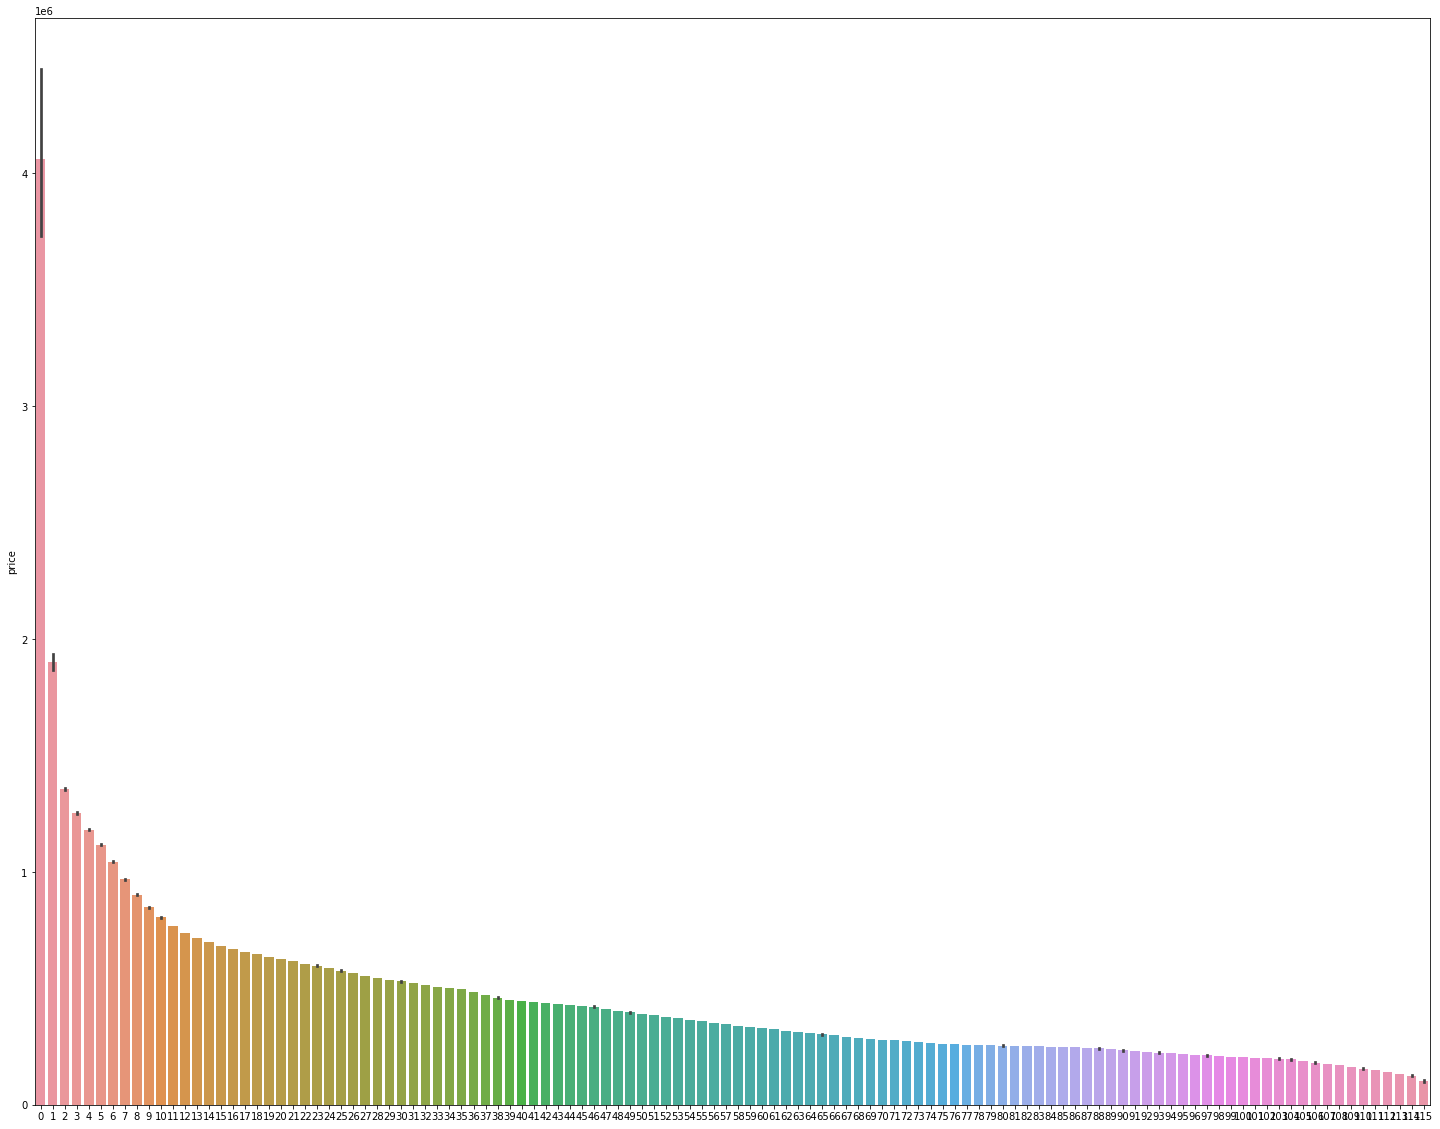

In [443]:
plt.figure(figsize=(25, 20))
sns.barplot(sorted(df['current age']), df['price'],data=df)
plt.show()

In [ ]:
##The above figure shows my feature variable negative correlated with target variable.
#so,we select current age as feature variable.

# splitting the data for training and testing 

In [445]:
house_predict.columns

Index(['date', 'price', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'total rooms',
       'current age'],
      dtype='object')

In [446]:
x=house_predict[[ 'sqft_living',
     'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 
         'total rooms','current age']]

In [447]:
x

,sqft_living,floors,waterfront,view,condition,grade,sqft_above,total rooms,current age
0,1180,1,0,0,3,7,1180,4,60
1,2570,2,0,0,3,7,2170,5,44
2,770,1,0,0,3,6,770,3,82
3,1960,1,0,0,5,7,1050,7,50
4,1680,1,0,0,3,8,1680,5,28
...,...,...,...,...,...,...,...,...,...
21608,1530,3,0,0,3,8,1530,6,6
21609,2310,2,0,0,3,8,2310,7,1
21610,1020,2,0,0,3,7,1020,3,6
21611,1600,2,0,0,3,8,1600,6,11


In [448]:
y=house_predict['price']

In [449]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [476]:
from sklearn.model_selection  import train_test_split

In [504]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=67)

In [505]:
x_train

,sqft_living,floors,waterfront,view,condition,grade,sqft_above,total rooms,current age
11285,1300,1,0,0,3,7,1300,5,48
9232,2450,2,0,0,3,8,2450,6,39
1255,2410,1,0,0,4,7,1940,5,64
6648,2320,2,0,2,3,8,2320,7,17
3514,4520,2,0,2,3,10,3270,8,23
...,...,...,...,...,...,...,...,...,...
859,1150,1,0,0,4,7,1150,5,38
13193,2250,2,0,0,3,8,2250,7,29
10247,2000,2,0,0,4,8,2000,6,23
1738,950,2,0,0,5,6,950,4,67


In [506]:
y_train

11285     236000.0
9232      510000.0
1255      600000.0
6648      400000.0
3514     1250000.0
           ...    
859       166600.0
13193     363000.0
10247     324360.0
1738      469000.0
21301     612995.0
Name: price, Length: 16209, dtype: float64

In [507]:
x_test

,sqft_living,floors,waterfront,view,condition,grade,sqft_above,total rooms,current age
3866,2050,1,0,0,3,7,1350,5,57
3482,1910,2,0,0,3,8,1910,6,14
10208,1390,1,0,0,3,7,1050,5,91
803,2990,2,0,0,3,9,2990,8,8
11812,880,1,0,0,4,6,880,3,99
...,...,...,...,...,...,...,...,...,...
16762,2490,2,0,0,3,7,2490,7,8
6003,1610,1,0,0,3,7,1260,5,27
5613,1200,1,0,0,4,7,1200,5,50
6809,1560,2,0,0,3,7,1560,6,13


In [508]:
y_test

3866     442000.0
3482     595000.0
10208    657100.0
803      625000.0
11812    199400.0
           ...   
16762    449400.0
6003     435000.0
5613     242500.0
6809     275000.0
970      532500.0
Name: price, Length: 5404, dtype: float64

In [509]:
#scaling process 

In [ ]:
#train data scaling

In [510]:
x_train_Scale=x_train.iloc[:,[0,6,8]]

In [511]:
x_train_Scale

,sqft_living,sqft_above,current age
11285,1300,1300,48
9232,2450,2450,39
1255,2410,1940,64
6648,2320,2320,17
3514,4520,3270,23
...,...,...,...
859,1150,1150,38
13193,2250,2250,29
10247,2000,2000,23
1738,950,950,67


In [512]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [513]:
x_train_std=std.fit_transform(x_train_Scale)
x_train_std

array([[-0.85329177, -0.58990379,  0.17707578],
       [ 0.40436911,  0.80476157, -0.13967519],
       [ 0.36062438,  0.1862578 ,  0.74018862],
       ...,
       [-0.08775906,  0.25902295, -0.70278803],
       [-1.23605813, -1.01436716,  0.84577228],
       [ 1.26832745,  1.18071484, -1.47706819]])

In [514]:
x_train[['sqft_living','sqft_above','current age']]=x_train_std

In [515]:
x_train

,sqft_living,floors,waterfront,view,condition,grade,sqft_above,total rooms,current age
11285,-0.853292,1,0,0,3,7,-0.589904,5,0.177076
9232,0.404369,2,0,0,3,8,0.804762,6,-0.139675
1255,0.360624,1,0,0,4,7,0.186258,5,0.740189
6648,0.262199,2,0,2,3,8,0.647104,7,-0.913955
3514,2.668159,2,0,2,3,10,1.799219,8,-0.702788
...,...,...,...,...,...,...,...,...,...
859,-1.017334,1,0,0,4,7,-0.771817,5,-0.174870
13193,0.185645,2,0,0,3,8,0.562211,7,-0.491621
10247,-0.087759,2,0,0,4,8,0.259023,6,-0.702788
1738,-1.236058,2,0,0,5,6,-1.014367,4,0.845772


In [516]:
x_test

,sqft_living,floors,waterfront,view,condition,grade,sqft_above,total rooms,current age
3866,2050,1,0,0,3,7,1350,5,57
3482,1910,2,0,0,3,8,1910,6,14
10208,1390,1,0,0,3,7,1050,5,91
803,2990,2,0,0,3,9,2990,8,8
11812,880,1,0,0,4,6,880,3,99
...,...,...,...,...,...,...,...,...,...
16762,2490,2,0,0,3,7,2490,7,8
6003,1610,1,0,0,3,7,1260,5,27
5613,1200,1,0,0,4,7,1200,5,50
6809,1560,2,0,0,3,7,1560,6,13


In [517]:
#scale the test dataset

In [518]:
x_text_Scale=x_test.iloc[:,[0,6,8]]

In [519]:
x_text_Scale

,sqft_living,sqft_above,current age
3866,2050,1350,57
3482,1910,1910,14
10208,1390,1050,91
803,2990,2990,8
11812,880,880,99
...,...,...,...
16762,2490,2490,8
6003,1610,1260,27
5613,1200,1200,50
6809,1560,1560,13


In [520]:
from sklearn.preprocessing import StandardScaler

In [521]:
x_test_std=std.transform(x_text_Scale)
x_test_std

array([[-0.03307815, -0.52926617,  0.49382675],
       [-0.1861847 ,  0.14987523, -1.01953901],
       [-0.75486614, -0.89309191,  1.69044154],
       ...,
       [-0.96265359, -0.71117904,  0.24746489],
       [-0.56895105, -0.27458814, -1.05473356],
       [-0.82048323, -0.69905151,  2.21835983]])

In [522]:
x_test[['sqft_living','sqft_above','current age']]=x_test_std

In [523]:
x_test

,sqft_living,floors,waterfront,view,condition,grade,sqft_above,total rooms,current age
3866,-0.033078,1,0,0,3,7,-0.529266,5,0.493827
3482,-0.186185,2,0,0,3,8,0.149875,6,-1.019539
10208,-0.754866,1,0,0,3,7,-0.893092,5,1.690442
803,0.994923,2,0,0,3,9,1.459648,8,-1.230706
11812,-1.312611,1,0,0,4,6,-1.099260,3,1.971998
...,...,...,...,...,...,...,...,...,...
16762,0.448114,2,0,0,3,7,0.853272,7,-1.230706
6003,-0.514270,1,0,0,3,7,-0.638414,5,-0.562010
5613,-0.962654,1,0,0,4,7,-0.711179,5,0.247465
6809,-0.568951,2,0,0,3,7,-0.274588,6,-1.054734


# model training

In [ ]:
#LinearRegression algorithm

In [524]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [525]:
lr.fit(x_train_std,y_train)

LinearRegression()

In [526]:
lr.predict(x_test_std)

array([549193.38969577, 426278.42592689, 440551.13145673, ...,
       291872.28207437, 313061.83870644, 468288.06317435])

In [527]:
y_test

3866     442000.0
3482     595000.0
10208    657100.0
803      625000.0
11812    199400.0
           ...   
16762    449400.0
6003     435000.0
5613     242500.0
6809     275000.0
970      532500.0
Name: price, Length: 5404, dtype: float64

In [528]:
lr.score(x_train_std,y_train)

0.5231678435529761

In [ ]:
#random forest algorithm

In [529]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 100, random_state =0)
regressor.fit(x_train_std,y_train)

RandomForestRegressor(random_state=0)

In [530]:
regressor.predict(x_test_std)

array([500939.76      , 537727.5       , 451663.        , ...,
       240019.54166667, 365822.45238095, 470290.89333333])

In [531]:
regressor.score(x_train_std,y_train)

0.915435194428393

conclusion:
          After the Final Submission of test data, my accuracy score 
In linear regression was 0.5231678435529761,
In Random forest was 0.915435194428393.
Amazingly random forest algorithm worked better than all other models.
future development:
                   If we have a data of inflation rate for particular year.we will predict all the upcoming year also.